# Introducción a Scipy

```Omar Abel Rodríguez López, Instituto de Física, UNAM```

```Noviembre 22, 2017```

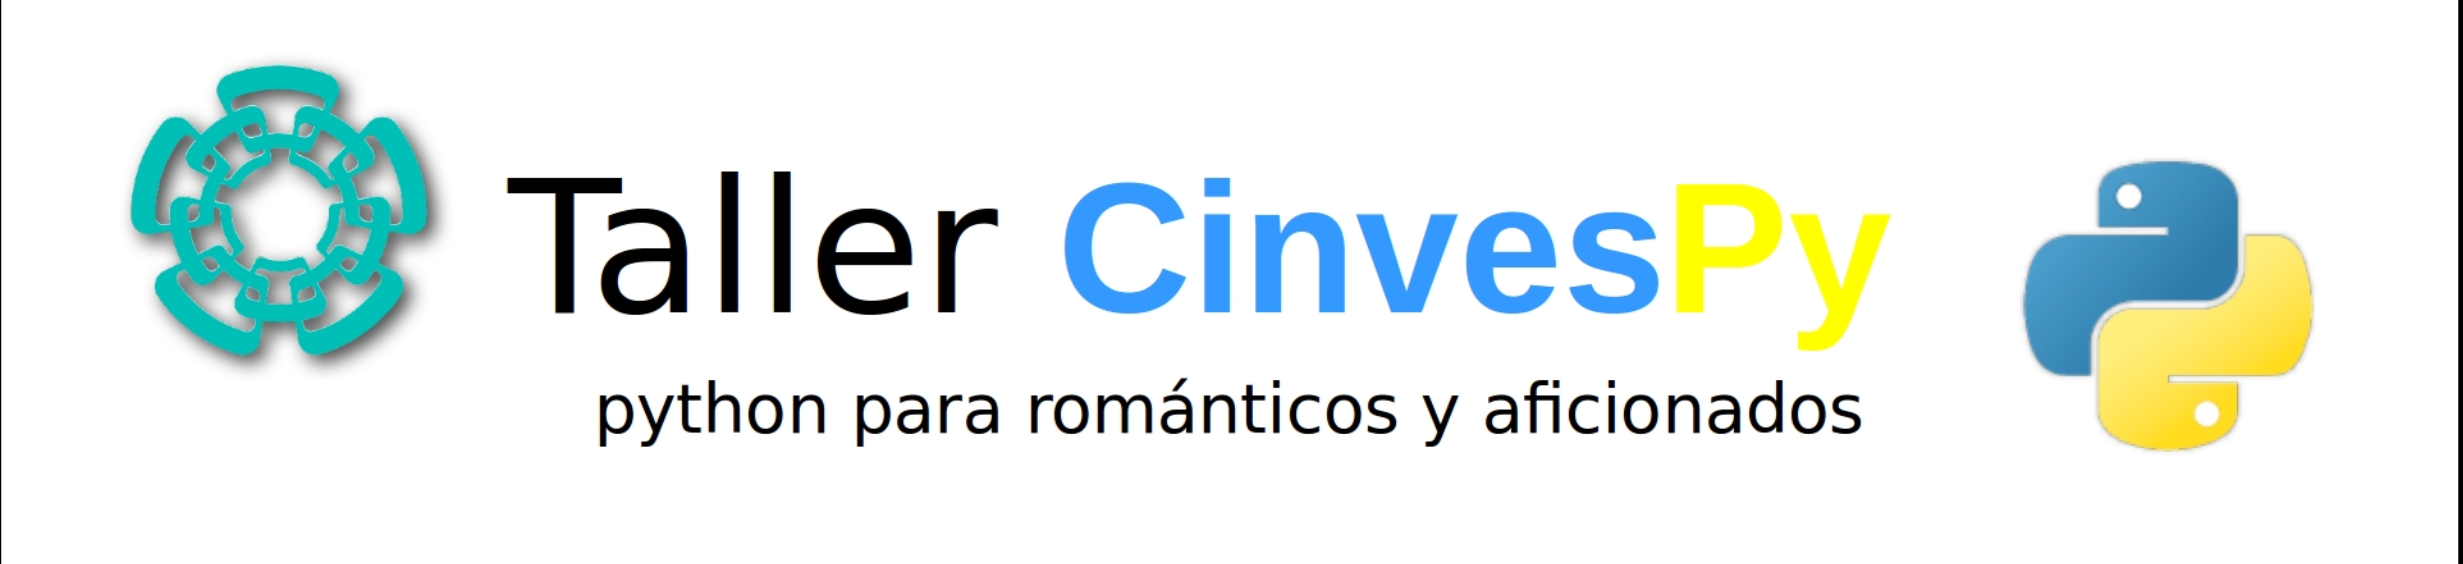

In [1]:
from IPython.display import Image
Image(filename='./img/cinvespy-logo.png')

----

## ¿Qué es Scipy?

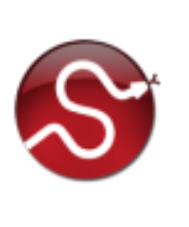

In [2]:
Image(filename='./img/scipy-logo.png', width=120)

* Scipy es una colección de algoritmos y bibliotecas matemáticas para hacer cómputo científico en Python.
* Fue iniciado desde 2001 por Travis Oliphant, Eric Jones y Pearu Peterson

* Incuye paquetes para analizar datos, resolver ecuaciones diferenciales, optimización y algebra lineal, entre otros.

* Convierte a Python en un lenguaje avanzado para desarrollar aplicaciones científicas, capaz de rivalizar con otros sistemas especializados como MATLAB, Mathematica, R, entre otros.

## ¿Cómo empezar a usar Scipy?

Desde una libreta de Jupyter ejecutamos

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Esta instrucción importa las principales rutinas de numpy y matplotlib al espacio global (``global namespace``) de la libreta. Después debemos importar scipy explícitamente, como

In [4]:
import scipy as sp

-----

## Estructura de Scipy

Scipy incluye varios subpaquetes con funcionalidades que cubren diferentes dominios científicos. Algunos de ellos son:

* ``constants``: Constantes físicas y matemáticas

* ``fftpack``: Fast Fourier Transform 

* ``integrate``: Integración y solución de ecuaciones diferenciales

* ``interpolate``: Interpolación

* ``io``: Lectura y escritura de datos

* ``linalg``: Álgebra Lineal

* ``ndimage``: Procesamiento de imágenes N-dimensional

* ``optimize``: Optimización y solución de ecuaciones no lineales

* ``signal``: Procesamiento de señales

* ``sparse``: Matrices dispersas (sparse matrices)

* ``special``: Funciones especiales

* ``stats``: Funciones y distribuciones estadísticas

En esta charla nos enfocaremos un algunos de esos subpaquetes.

-----

## Álgebra Lineal

El subpaquete de álgebra linear nos permite hacer diversas operaciones sobre matrices, como descomposiciones, resolver sistemas de ecuaciones lineales y encontrar los eigenvalores y eigenvectores de una matriz. Tiene como base la biblioteca [LAPACK](https://docs.scipy.org/doc/scipy/reference/linalg.lapack.html#module-scipy.linalg.lapack).

In [5]:
import scipy.linalg as linalg

### Factorización LU

Para resolver el sistema de ecuaciones lineales $A x = b$, donde $A$ es la matriz del sistema y $b$ el vector constante podemos usar la [Factorización LU](https://en.wikipedia.org/wiki/LU_decomposition).

Ejemplo:

In [6]:
aM = random_sample((10, 10))
b = random_sample(10)

# Factoriza
aLU = linalg.lu_factor(aM)

# Resuelve
sv = linalg.lu_solve(aLU, b)
sv

array([-0.14606643,  1.26008385,  0.39160306,  1.31318337, -0.38173174,
       -0.11970722, -1.26933955, -1.0280556 ,  0.26927542,  0.87904117])

La función ``lu_factor`` calcula la factorización LU de $A$, mientras que ``lu_solve`` calcula la solución del sistema con la factorización previamente obtenida.

Podemos verificar la solución obtenida:

In [7]:
diff = dot(aM, sv) - b

# Calcula la norma de la matriz diferencia
norm(diff)

4.1910000110727263e-16

### Eigenvalores y eigenvectores

Podemos calcular los eigenvectores y eigenvalores de una matriz cuadrada, general o hermítica:

$$ A x_n = \lambda_n x_n $$

In [8]:
aM = random_sample((10, 10))

# Eigenvalores y eigenvectores
evl, evc = linalg.eig(aM)

Los eigenvectores se almacenan en el array ``evc``, y los eigenvalores en ``evl``. 

El i-ésimo eigenvalor ``evl[i]`` corresponde al eigenvector ``evc[:, i]``, es decir, la i-ésima columna de ``evc``.

In [9]:
ndx = 0
evl_ndx = evl[ndx]
evc_ndx = evc[:, ndx]

diff = dot(aM, evc_ndx) - evl_ndx * evc_ndx
norm(diff)

4.3976605291403369e-15

### Determinantes y matriz inversa

Calcular el determinante y la matriz inversa es sencillo:

In [10]:
aM = random_sample((10, 10))
inv_aM = linalg.inv(aM)

# Diferencia entre el producto de la matriz y su inversa y la identidad
diff = dot(inv_aM, aM) - eye(10)
norm(diff)

6.4099164270536697e-15

In [11]:
aM = random_sample((10, 10))
linalg.det(aM)

-0.0023454532527541648

Además de lo anterior, el subpaquete ``linalg`` contiene muchas rutinas adicionales para resolver problemas que incluyen matrices especiales, como matrices hermíticas o simétricas, matrices tridiagonales o matrices circulates, por nombrar algunos ejemplos.


### Referencias:

* https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

----

## Integración y solución de ecuaciones diferenciales

Con el subpaquete ``integrate`` podemos calcular integrales sobre un gran número de funciones acotadas y no acotadas, en dominios finitos y no acotados. También permite resolver problemas de condición inicial para ecuaciones diferenciales y problemas de condición de frontera.

In [12]:
import scipy.integrate as integrate

### Integrales definidas

Para obtener una aproximación de la integral definida

$$
I = \int_a^b f(x) dx
$$

tenemos a nuestra disposición la función [``quad``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad): **``quad(func, x0, xf)``**.

Ejemplo: la integral gaussiana, $I = \int_{-\infty}^{\infty} e^{-x^2} dx$.

In [13]:
def fx(x):
    return exp(-x**2)

# Integral sobre todo el eje real
iv, i_err = integrate.quad(fx, -inf, inf)
iv, i_err

(1.7724538509055159, 1.4202636781830878e-08)

Sabemos que esta integral es $\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}$, ¿qué tan buena es la aproximación?

In [14]:
fabs(sqrt(pi) - iv)

0.0

Además de integrales en una dimensión, Scipy puede calcular integrales dobles, triples y de mayor 
orden con las funciones **``dblquad``**, **``tplquad``** y **``nquad``**.

### Problemas de condición inicial para una ecuación diferencial ordinaria

Buscamos aproximar la solución del problema de condición inicial

$$
\frac{d\vec{y}}{dt} = f(t, \vec y), \quad \vec{y}(0) = \vec y_0,
$$

donde $\vec y (t) = (y_1(t), y_2(t), \ldots, y_N(t))$

Ejemplo: el [oscilador armónico](https://en.wikipedia.org/wiki/Harmonic_oscillator)

$$
\frac{d^2 x}{dt^2} + 2 \gamma \frac{dx}{dt} + \omega_0^2 x = 0
$$

Replanteamos esta ecuación de segundo orden como dos ecuaciones de primer orden acopladas:

$$ 
\frac{dx}{dt} = v, \quad v(0) = v_0
$$

$$
\frac{dv}{dt} = -2 \gamma v - \omega_0^2 x, \quad x(0) = x_0
$$

Ahora la planteamos de tal manera que podemos usar la función [``odeint``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) para resolver este sistema.

Sea $\vec y (t) = (x(t), v(t))$, entonces $f(t, \vec y) = (v, -2 \gamma v - \omega_0^2 x)$. Así

In [15]:
def func(y, t, gamma, w0):
    x = y[0]
    v = y[1]
    return v, -2 * gamma * v - w0 ** 2 * x

Ahora resolvemos la ecuación sobre un intervalo de tiempo dado:

In [16]:
gamma = 1
w0 = 5
y0 = [5, 0]

tu = 2 * pi / w0
t0, tf = 0, 4 * tu
tiv = linspace(0, tf, 200)

ode_sol = integrate.odeint(func, y0, tiv, args=(gamma, w0))

Visualicemos:

(0, 4.0)

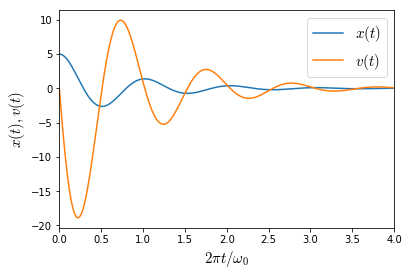

In [17]:
rc('mathtext', fontset='cm')

plot(tiv / tu, ode_sol[:, 0], label=r'$x(t)$')
plot(tiv / tu, ode_sol[:, 1], label=r'$v(t)$')

legend(fontsize=15, loc='best')
xlabel(r'$2 \pi t / \omega_0$', fontsize=15)
ylabel(r'$x(t), v(t)$', fontsize=15)

xlim(0, tf / tu)

**Ejercicio**: Analice cómo cambian la posición $x(t)$ y la velocidad $v(t)$ cuando:

a) $\omega_0 > \gamma$

b) $\omega_0 = \gamma$

c) $\omega_0 < \gamma$

d) $\gamma = 0$

### Referencias adicionales:

* https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

* https://docs.scipy.org/doc/scipy/reference/integrate.html

----

## Interpolación de datos

El subpaquete ``interpolate`` contiene rutinas para crear funciones interpoladoras sobre un conjunto de puntos en una y dos dimensiones, incluyendo splines y polinomios interpoladores de Lagrange.

In [18]:
import scipy.interpolate as interpolate

## Interpolación en 1d

Para interpolar en una dimensión siempre podemos usar de manera inmediata la función 
**``interp1d(x, y, kind)``**, la cual requiere las abscisas **``x``** y las ordenadas **``y``** sobre las cuales se ha de interpolar, y el tipo ``kind`` de interpolación que se ha de usar. Usa splines 

In [19]:
x = linspace(0, 2 * pi, 10)
y = sin(x) + 0.05 * random_sample(10)

fiy = interpolate.interp1d(x, y, kind='cubic')

# Define un intervalo con más puntos (pero dentro del intervalo interpolado)
x_fine = linspace(x[0], x[-1], 100)

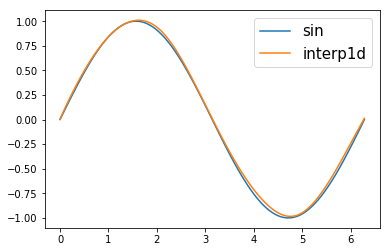

In [20]:
plot(x_fine, sin(x_fine), label='sin')
plot(x_fine, fiy(x_fine), label='interp1d')
legend(loc='best', fontsize=15)

##  Interpolación en 2d

Para interpolar en dos dimensión usamos una función análoga a la situación en una dimensión:
**``interp2d(x, y, z, kind)``**, la cual requiere las abscisas **``x``**, las ordenadas **``y``** y el valor de la función **``z``** sobre los cuales se ha de interpolar, y el tipo ``kind`` de interpolación que se ha de usar. También usa splines.

In [52]:
xm, ym = mgrid[-5:5:0.25, -5:5:0.25]
zm = sin(xm**2 + ym**2)

fiz = interpolate.interp2d(xm, ym, zm, kind='cubic')

# Define un intervalo con más puntos (pero dentro del intervalo interpolado)
x_fine = linspace(xm[0, 0], xm[-1, 0], 100)
y_fine = linspace(ym[0, 0], ym[0, -1], 100)

z_fine = fiz(x_fine, y_fine)

Visualicemos

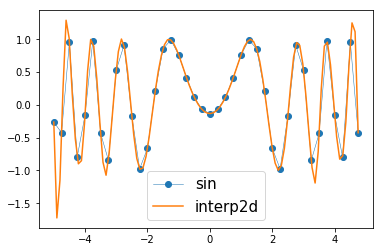

In [55]:
plot(xm[:, 0], zm[:, 0], marker='o', lw=0.5, label='sin')
plot(x_fine, z_fine[:, 0], label='interp2d')
legend(loc='best', fontsize=15)

### Referencias adicionales

* https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

----

## Referencias adicionales sobre Scipy

* https://scipy.org/. Sitio oficial del proyecto Scipy
* https://docs.scipy.org/doc/scipy/reference/. Documentación oficial